# Simple Regression Modeling with Boston Housing dataset - Lab

In this final lab, we shall apply the regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We performed a detailed EDA for this dataset in earlier section and hence carry a good understanding of how this dataset is composed. This this lab we shall try to identify the predictive ability of some of features found in this dataset towards identifying house price. 

### Objectives:
You will be able to:
* Build many linear models with boston housing data set using OLS
* For each model, analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

Let's get started. 

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [1]:
# Your code here 
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('fivethirtyeight')

    100% |████████████████████████████████| 7.4MB 5.5MB/s eta 0:00:01    83% |██████████████████████████▉     | 6.2MB 56.2MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 37.0MB/s ta 0:00:01
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('BostonHousing.csv')

The data features and target are present as columns in boston data. Boston data gives a set of independent as independent variables in data and the housing rate as `MEDV` in target property. Also feature names are listed in feature_names. The desription is available at [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [3]:
# Your code here 
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Record your observations here 
# There are 14 columns in this dataset. They all contain numerical data, but some appear to be categorical.

### Create histograms for all variables in the dataset and comment on their shape (uniform or not ?)

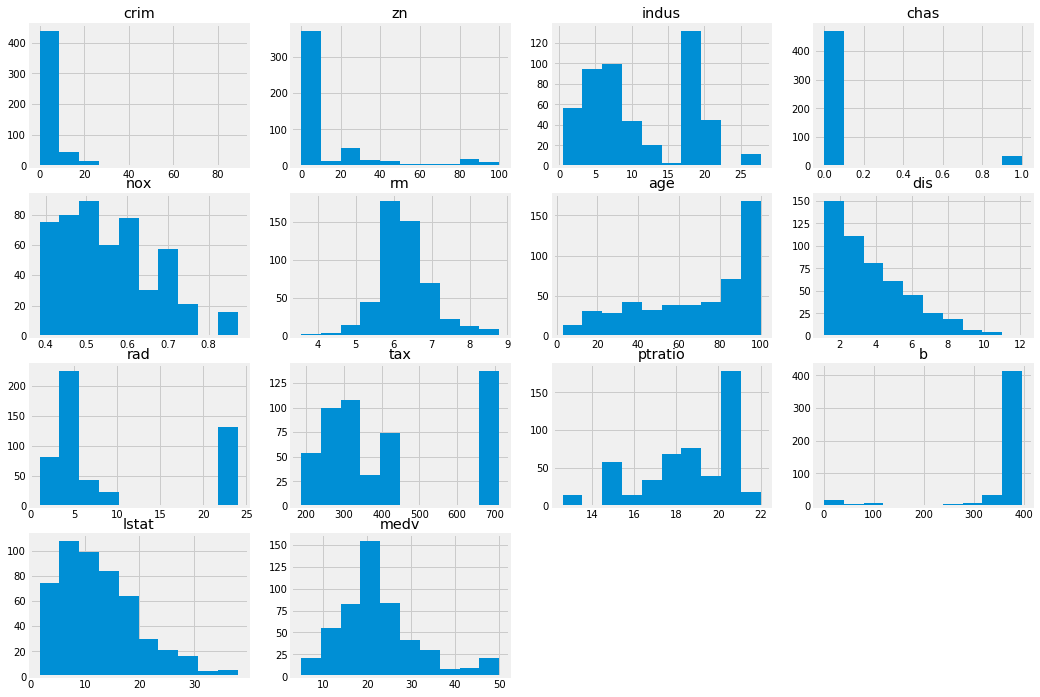

In [5]:
fig = plt.figure(figsize=(16,12))
x=0
for i in df:
    x += 1
    plt.subplot(4,4,x)
    plt.hist(df[i])
    plt.title(f'{i}')

In [6]:
# You observations here 
# None of the histograms appear normal. Room count, 'rm', and median value, 'medv', appear more normal than others.

Based on this , we shall choose a selection of features which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [7]:
# Your code here 
df2 = df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']].copy()
df2.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots and comment on the results

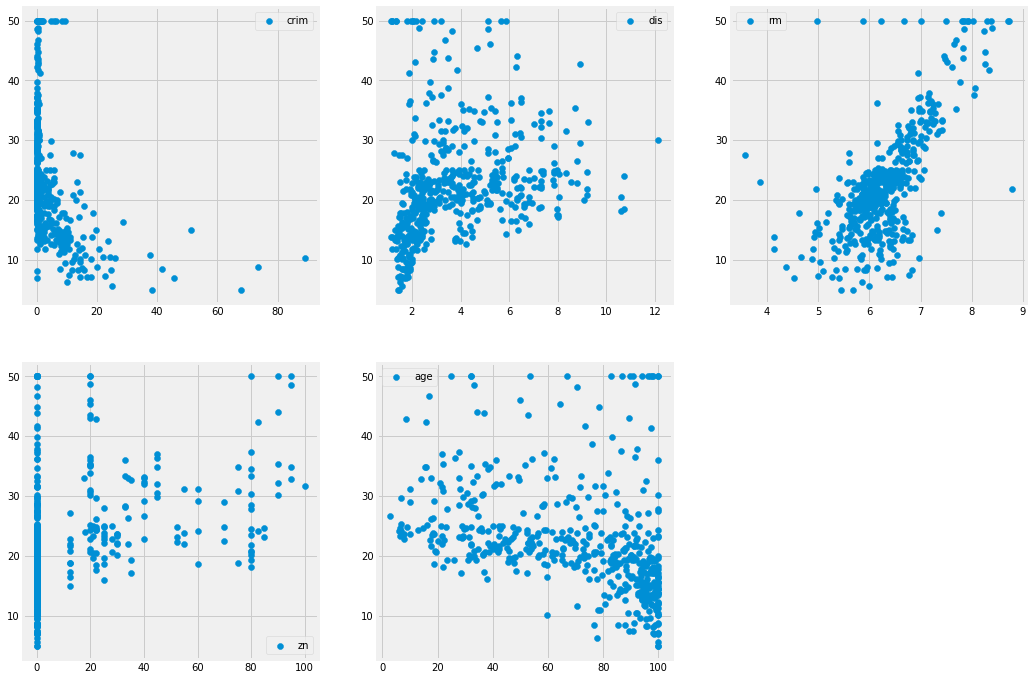

In [8]:
# Your code here 
fig = plt.figure(figsize=(16,12))
x=0
for i in df2.set_index(['medv']):
    x += 1
    plt.subplot(2,3,x)
    plt.scatter(df2[i],df2['medv'], label=f'{i}')
    plt.legend()

In [9]:
# Your observations here 
# All variables contain many outliers. Some linearity can be seen for each variable, but none is clear.

Okie so obviously our data needs a lot of pre-procesing to improve the results. This key behind such kaggle competitions is to process the data in such a way that we can identify the relationships and make predictions in the best possible way. For now, we shall leave the dataset untouched and just move on with regression. So far, our assumptions, although not too strong, but still hold to a level that we can move on. 

### Let's do Regression 

Right here is the real deal. Let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). We shall do this is a loop and in every iteration, we shall pick one of the independent variables  perform following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`.
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~crim
-------------------------------------------------------------------------------------


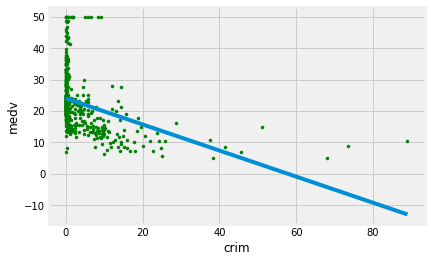

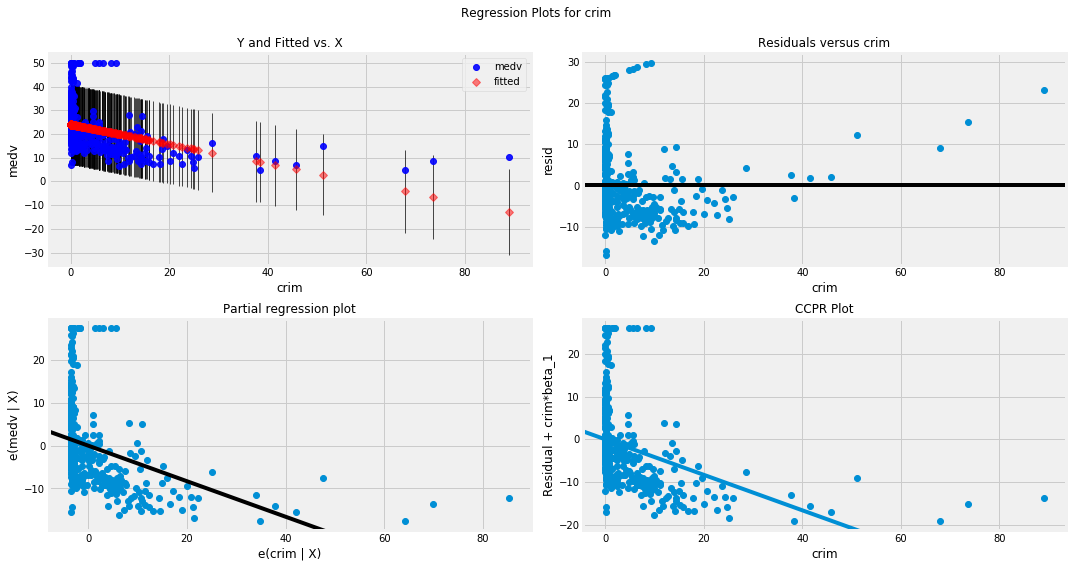

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


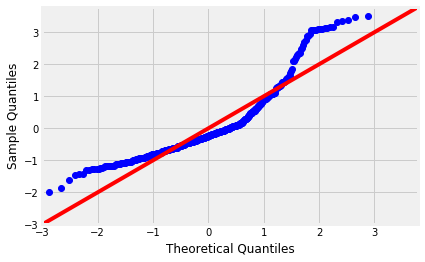

Press enter to continue: 
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~dis
-------------------------------------------------------------------------------------


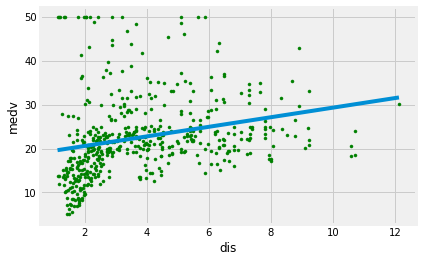

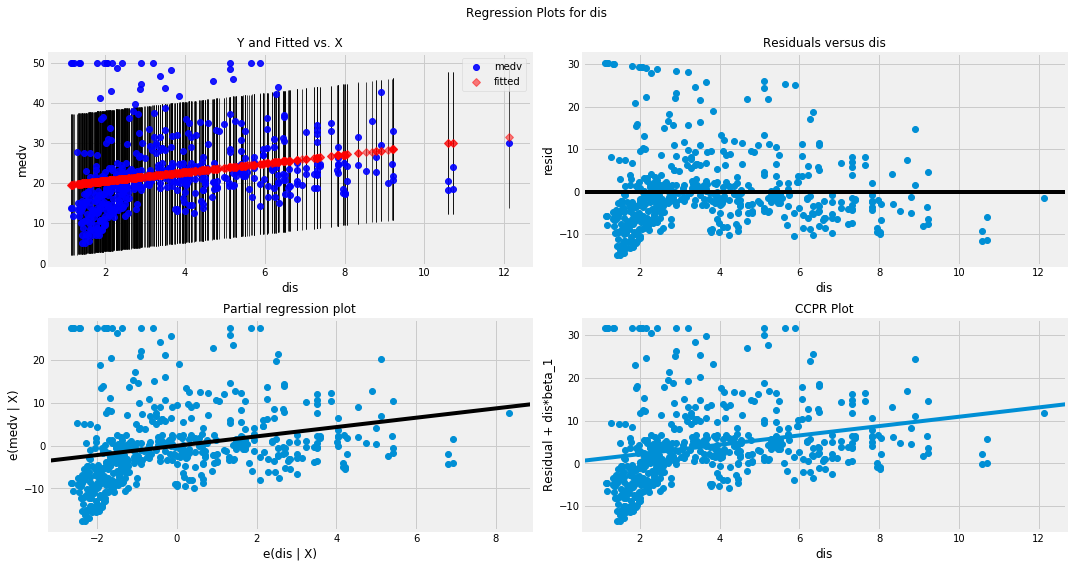

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


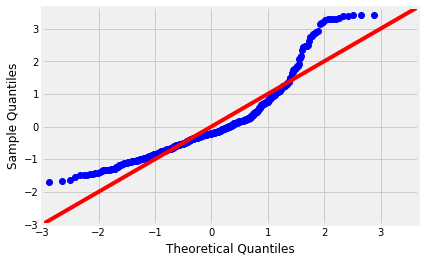

Press enter to continue: 
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~rm
-------------------------------------------------------------------------------------


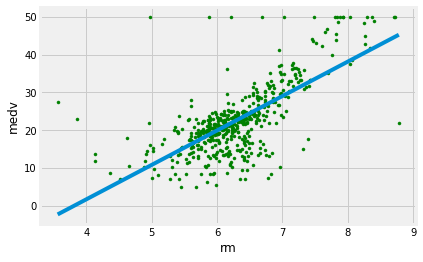

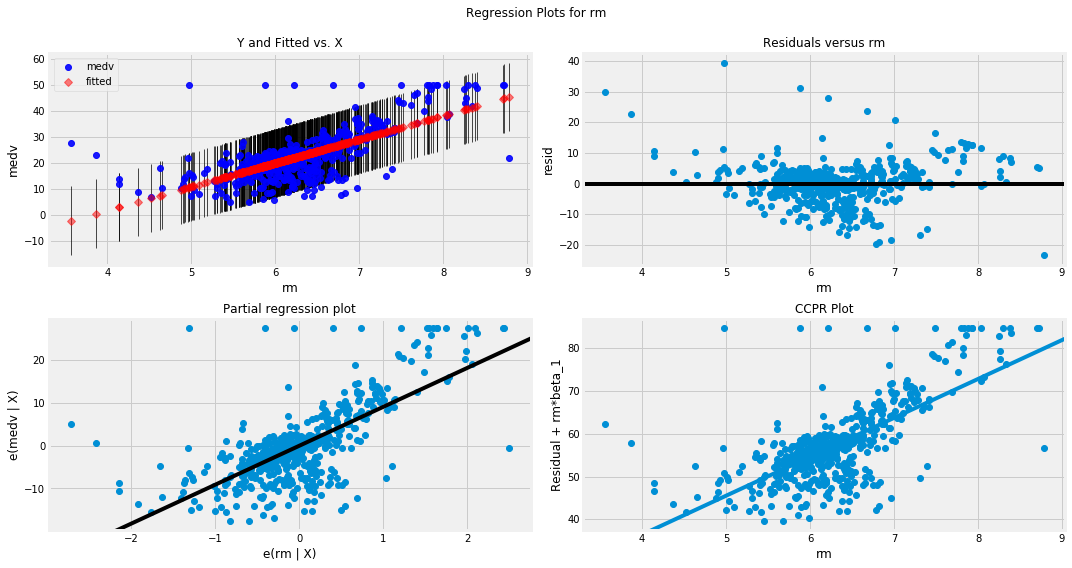

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


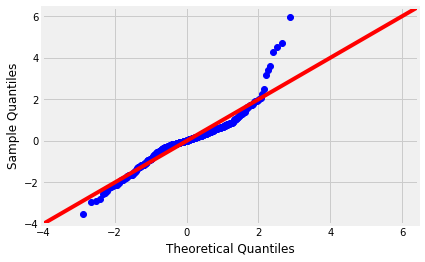

Press enter to continue: 
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~zn
-------------------------------------------------------------------------------------


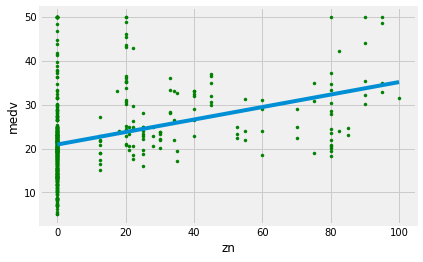

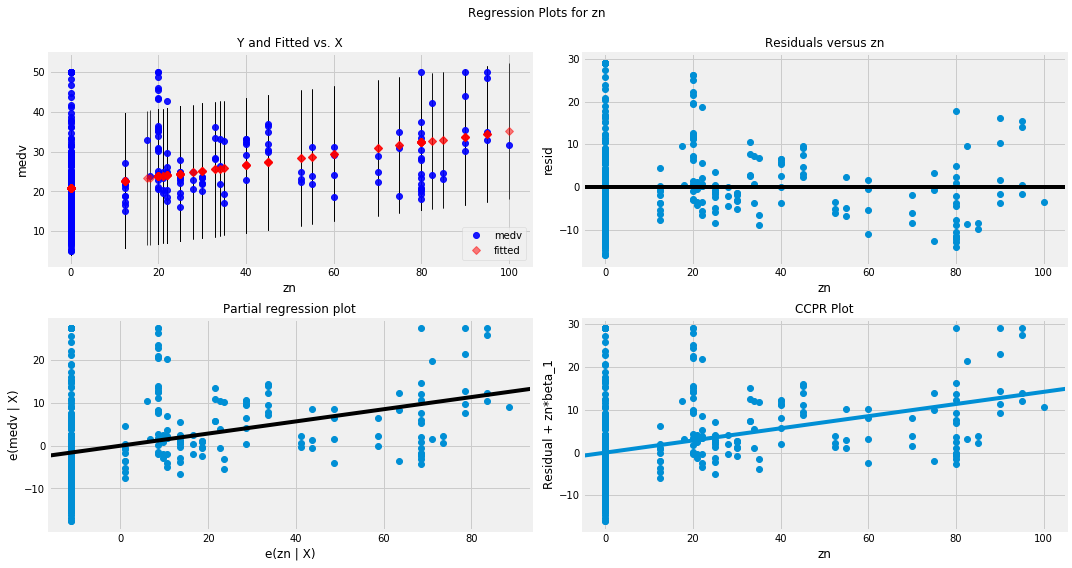

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


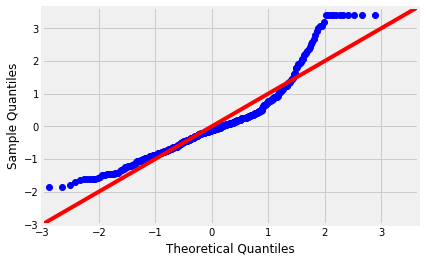

Press enter to continue: 
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~age
-------------------------------------------------------------------------------------


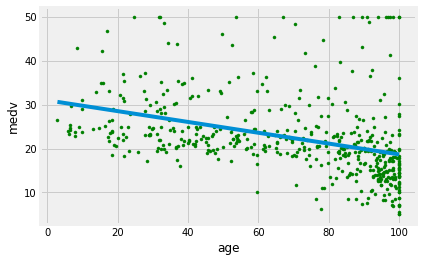

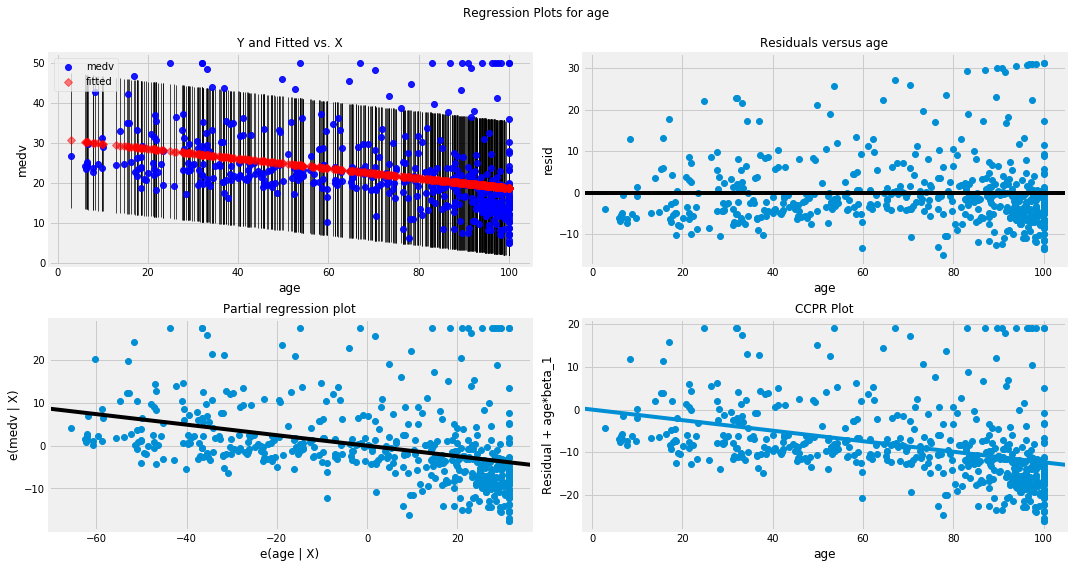

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


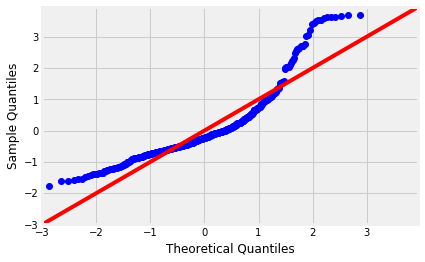

Press enter to continue: 


In [13]:
results = [['ind_var','r_squared','intercept','slope','p-value','normality (JB)']]
for i in df2.set_index(['medv']):
    print(f'Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~{i}')
    print('-------------------------------------------------------------------------------------')
    f = f'medv~{i}'
    model = smf.ols(formula=f, data=df2).fit()

    x = pd.DataFrame([df2[i].min(), df2[i].max()], columns=[i])
    y = model.predict(x)
    
    plt.scatter(df2[i], df2['medv'], c='green', marker='.')
    plt.plot(x, y)
    plt.xlabel(f'{i}')
    plt.ylabel('medv')
    plt.show()
    
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, i, fig=fig)
    plt.show()
    
    resid = model.resid_pearson
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    fig.show()
    plt.show()
    
    
    results.append([i,model.rsquared,model.params[0],model.params[1],model.pvalues[1],sms.jarque_bera(model.resid)[0]])
    input('Press enter to continue: ')

In [11]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,crim,0.15078,24.0331,-0.41519,1.17399e-19,295.404
2,dis,0.0624644,18.3901,1.09161,1.20661e-08,305.104
3,rm,0.483525,-34.6706,9.10211,2.48723e-74,612.449
4,zn,0.129921,20.9176,0.14214,5.71358e-17,262.387
5,age,0.142095,30.9787,-0.123163,1.56998e-18,456.983


In [12]:
#Your obervations here 
# Of all the results, 'rm' came closest 

So clearly the results are not highly reliable. the best good of fit i.e. r-squared is witnessed with `rm`. So clearly in this analysis this is our best predictor. 

---
#### So how can we improve upon these results . 
1. Pre-Processing 

This is where pre-processing of data comes in. Dealing with outliers, normalizing data, scaling values etc can help regression analysis get more meaningful results from the given set of data 

2. Advanced Analytical Methods

Simple regression is a very basic analysis techniques and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. In the next section we shall look at multiple regression where we can use multiple features **AT ONCE** to define a relationship with outcome. We shall also look at some pre-processing and data simplification techniques and re-visit the boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the the goodness of fit. 
![](https://i.pinimg.com/originals/e5/a5/1e/e5a51eff1b2133105ebaa9b779106ae2.png)

In [130]:
df3 = df[['rm','medv','age']].copy()
df3.head()

,rm,medv,age
0,6.575,24.0,65.2
1,6.421,21.6,78.9
2,7.185,34.7,61.1
3,6.998,33.4,45.8
4,7.147,36.2,54.2


(array([10., 37., 45., 10., 16., 15.,  4.,  0.,  4.,  3.]),
 array([16.1 , 19.34, 22.58, 25.82, 29.06, 32.3 , 35.54, 38.78, 42.02,
        45.26, 48.5 ]),
 <a list of 10 Patch objects>)

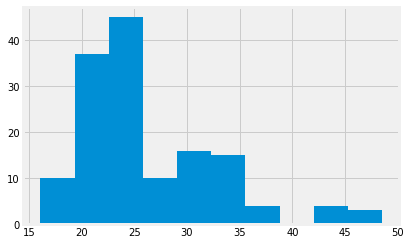

In [137]:
plt.hist(df3['medv'])

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <a list of 10 Patch objects>)

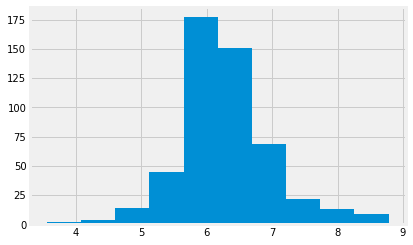

In [132]:
plt.hist(df3['rm'])

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <a list of 10 Patch objects>)

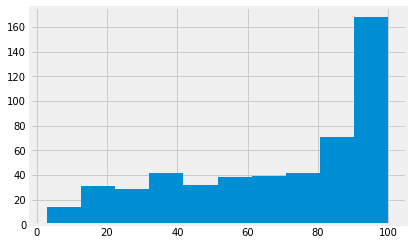

In [133]:
plt.hist(df3['age'])

In [138]:
#df3 = df3.loc[(df3['medv']<50) & (df3['medv']>=0) & (df3['rm']>4) & (df3['rm']<8.5) & (df3['age']<50)]
df3 = df3.loc[(df3['age']<50) & (df3['medv']<40)]

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~rm
-------------------------------------------------------------------------------------


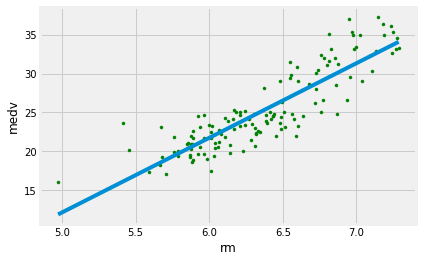

In [ ]:
results = [['ind_var','r_squared','intercept','slope','p-value','normality (JB)']]
for i in df3.set_index(['medv']):
    print(f'Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~{i}')
    print('-------------------------------------------------------------------------------------')
    f = f'medv~{i}'
    model = smf.ols(formula=f, data=df3).fit()

    x = pd.DataFrame([df3[i].min(), df3[i].max()], columns=[i])
    y = model.predict(x)
    
    plt.scatter(df3[i], df3['medv'], c='green', marker='.')
    plt.plot(x, y)
    plt.xlabel(f'{i}')
    plt.ylabel('medv')
    plt.show()
    
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, i, fig=fig)
    plt.show()
    
    resid = model.resid_pearson
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    fig.show()
    plt.show()
    
    results.append([i,model.rsquared,model.params[0],model.params[1],model.pvalues[1],sms.jarque_bera(model.resid)[0]])

In [136]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,rm,0.821706,-43.5428,10.8405,4.98555e-55,4.65967
2,age,0.0208166,28.5427,-0.0769581,0.0844723,51.7877


## Summary 

In this lab, we attempted to bring in all the skills learnt so far to a slighlt detailed dataset. We looked at the outcome of our analysis and realized that the data might need some pre-processing to see a clear improvement in results. We shall pick it up in the next section from this point and bring in data pre-processing techniques along with some assumptions that are needed for multiple regression . 